In [65]:
# работа с данными
import pandas as pd
import numpy as np

# графики
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# настройка графиков
matplotlib.rcParams['figure.figsize'] = (4, 4)
sns.set_style('whitegrid')

# предупреждения
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# tqdm
from tqdm.notebook import tqdm
# time
import itertools

# работа с файлами
import pickle
import json

# copy
from copy import deepcopy

#отображение
from IPython.display import clear_output

In [21]:
import os
# os.path.abspath(os.curdir)
# os.chdir('..')
# os.path.abspath(os.curdir)
os.chdir('src/data')
os.path.abspath(os.curdir)

'C:\\Users\\ranas\\ML course\\VKR\\ml_vkr\\src\\data'

In [53]:
df = pd.read_csv('Hotel_Reviews.csv')

In [54]:
df.shape

(515738, 17)

In [55]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [57]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
df['Review_Date']

0        2017-08-03
1        2017-08-03
2        2017-07-31
3        2017-07-31
4        2017-07-24
            ...    
515733   2015-08-30
515734   2015-08-22
515735   2015-08-19
515736   2015-08-17
515737   2015-08-09
Name: Review_Date, Length: 515738, dtype: datetime64[ns]

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Additional_Number_of_Scoring,515738.0,498.081836,500.538467,1.000000,169.000000,341.000000,660.000000,2682.000000
Average_Score,515738.0,8.397487,0.548048,5.200000,8.100000,8.400000,8.800000,9.800000
Review_Total_Negative_Word_Counts,515738.0,18.539450,29.690831,0.000000,2.000000,9.000000,23.000000,408.000000
Total_Number_of_Reviews,515738.0,2743.743944,2317.464868,43.000000,1161.000000,2134.000000,3613.000000,16670.000000
Review_Total_Positive_Word_Counts,515738.0,17.776458,21.804185,0.000000,5.000000,11.000000,22.000000,395.000000
Total_Number_of_Reviews_Reviewer_Has_Given,515738.0,7.166001,11.040228,1.000000,1.000000,3.000000,8.000000,355.000000
Reviewer_Score,515738.0,8.395077,1.637856,2.500000,7.500000,8.800000,9.600000,10.000000
lat,512470.0,49.442439,3.466325,41.328376,48.214662,51.499981,51.516288,52.400181
lng,512470.0,2.823803,4.579425,-0.369758,-0.143372,0.010607,4.834443,16.429233


In [59]:
#1494 уникальных адреса-отеля
hotel_stat = df.groupby(['Hotel_Address', 'Hotel_Name']).agg(reviews_number = ('Review_Date', 'count'),
                                                scoring_number = ('Additional_Number_of_Scoring', 'max'),
                                                average_score = ('Average_Score', 'max'),
                                                average_words_in_neg_review = ('Review_Total_Negative_Word_Counts', 'mean'),
                                                average_words_in_pos_review = ('Review_Total_Positive_Word_Counts', 'mean'),
                                                total_number_of_reviews = ('Total_Number_of_Reviews', 'max'),
                                                average_score_in_dataset = ('Reviewer_Score', 'mean')
                                               )

Сколько всего есть отзывов по одному отелю

<AxesSubplot:>

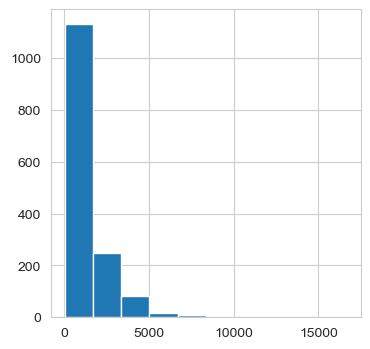

In [66]:
hotel_stat['total_number_of_reviews'].hist()

Распределение числа отзывов по отелям в выборке

array([[<AxesSubplot:title={'center':'reviews_number'}>]], dtype=object)

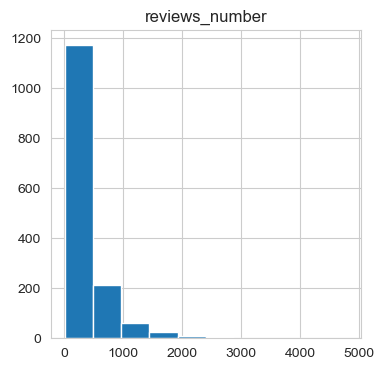

In [67]:
df.groupby(['Hotel_Address', 'Hotel_Name']).agg(reviews_number = ('Review_Date', 'count')).hist(bins=10)

Мы имеем не все доступные по отелю отзывы

<AxesSubplot:>

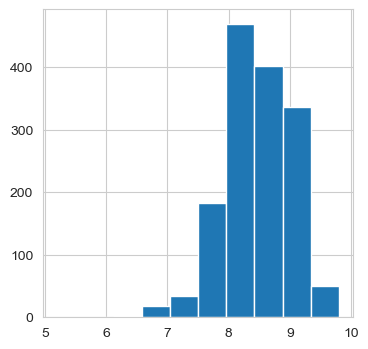

In [68]:
hotel_stat['average_score'].hist()

<AxesSubplot:>

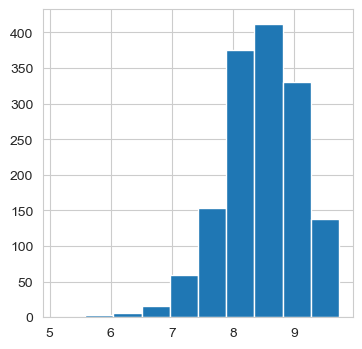

In [69]:
hotel_stat['average_score_in_dataset'].hist()

Разница между средним скором в выборке и средним скором на сайте небольшая

<AxesSubplot:>

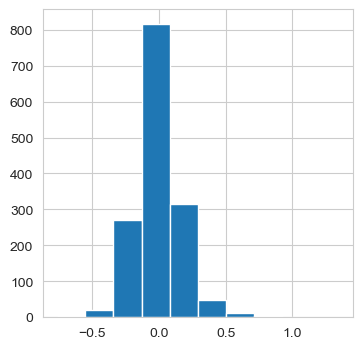

In [74]:
hotel_stat['average_score_diff'] = hotel_stat['average_score'] - hotel_stat['average_score_in_dataset']
hotel_stat['average_score_diff'].hist()

В выборке как и во всей совокупности отзывов распределение средних отзывов на отель смещено вправо

Если смотреть на отдельного человека в выборке, то видим, что положительных отзывов (>5) значительно больше:

<AxesSubplot:>

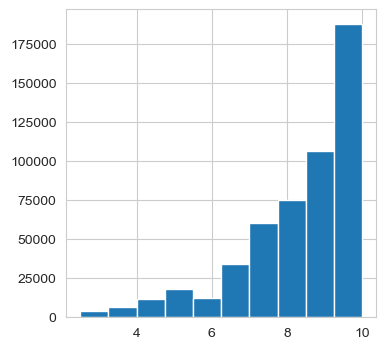

In [71]:
df['Reviewer_Score'].hist(bins=10)

In [73]:
len(df[df['Reviewer_Score']>=5])/len(df['Reviewer_Score'])

0.9567978314570577

95% отзывов положительные

In [75]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [87]:
nationals_stat = df[df['Reviewer_Nationality'].notna()].groupby(['Reviewer_Nationality']).agg(reviews_number = ('Hotel_Name', 'count'),
                                                          reviews_number_overall = ('Total_Number_of_Reviews_Reviewer_Has_Given', 'mean'),
                                                            average_words_in_neg_review = ('Review_Total_Negative_Word_Counts', 'mean'),
                                                            average_words_in_pos_review = ('Review_Total_Positive_Word_Counts', 'mean'),
                                                            average_score = ('Reviewer_Score', 'mean')
                                                            )

In [101]:
#227 уникальных национальностей
nationals_stat

,reviews_number,reviews_number_overall,average_words_in_neg_review,average_words_in_pos_review,average_score
Reviewer_Nationality,,,,,
United Kingdom,245246,5.173299,18.894481,17.590929,8.486352
United States of America,35437,5.212546,18.820922,23.202331,8.786999
Australia,21686,8.467398,17.195610,20.698100,8.591718
Ireland,14827,5.193026,19.361570,18.661024,8.464052
United Arab Emirates,10235,8.539521,18.238202,14.673766,7.878828
...,...,...,...,...,...
Cape Verde,1,2.000000,0.000000,51.000000,9.600000
Comoros,1,2.000000,0.000000,6.000000,10.000000
Svalbard Jan Mayen,1,16.000000,2.000000,3.000000,10.000000


ТОП 10 национальностей, которые оставляют отзывы

In [110]:
matplotlib.rcParams['figure.figsize'] = (8, 4)

<AxesSubplot:xlabel='Reviewer_Nationality'>

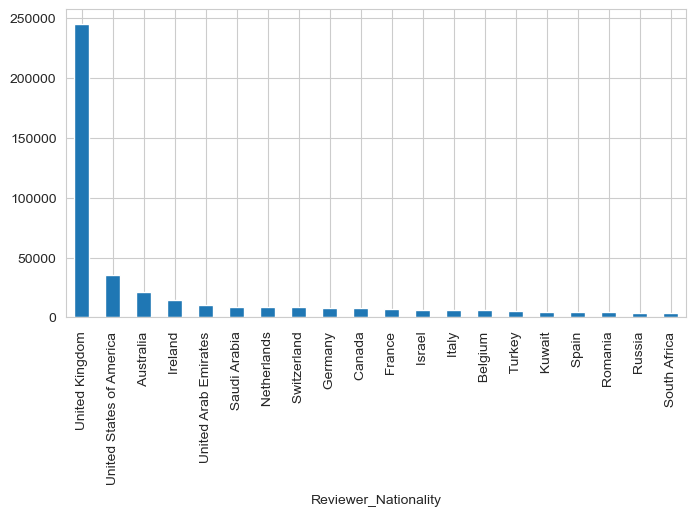

In [111]:
nationals_stat = nationals_stat.sort_values(by='reviews_number', ascending=False)
nationals_stat.iloc[:20, 0].plot.bar()

In [113]:
sum(nationals_stat['reviews_number']>=1000)/len(nationals_stat)

1.0

In [117]:
nationals_stat = nationals_stat[nationals_stat['reviews_number']>=1000]
len(nationals_stat)

55

ТОП 20 национальностей, люди которых часто оставляют отзывы

<AxesSubplot:xlabel='Reviewer_Nationality'>

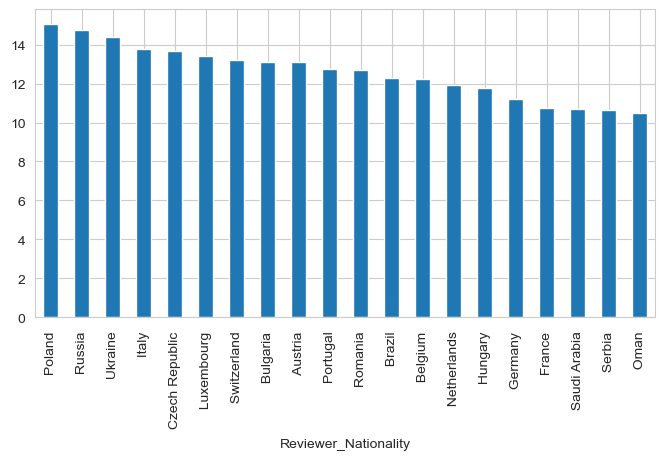

In [116]:
nationals_stat = nationals_stat.sort_values(by='reviews_number_overall', ascending=False)
nationals_stat.iloc[:20, 1].plot.bar()

Национальности, которые больше всех пишут плохое

<AxesSubplot:xlabel='Reviewer_Nationality'>

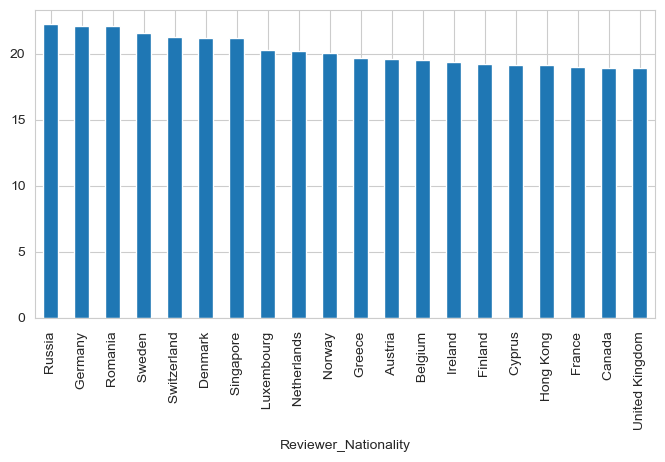

In [118]:
nationals_stat = nationals_stat.sort_values(by='average_words_in_neg_review', ascending=False)
nationals_stat.iloc[:20, 2].plot.bar()

Национальности, которые больше всех пишут хорошее

<AxesSubplot:xlabel='Reviewer_Nationality'>

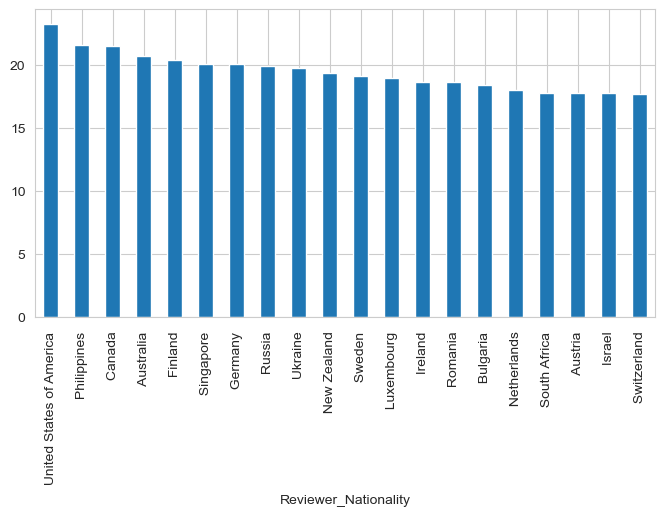

In [120]:
nationals_stat = nationals_stat.sort_values(by='average_words_in_pos_review', ascending=False)
nationals_stat.iloc[:20, 3].plot.bar()

Национальности, которые больше ставят самые высокие отзывы

<AxesSubplot:xlabel='Reviewer_Nationality'>

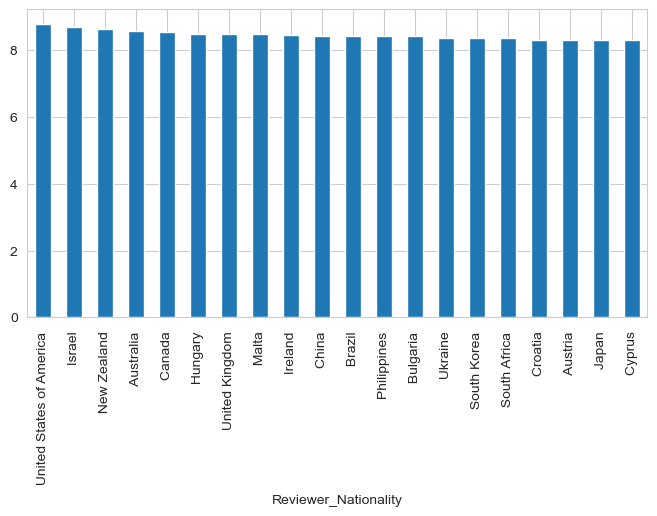

In [121]:
nationals_stat = nationals_stat.sort_values(by='average_score', ascending=False)
nationals_stat.iloc[:20, 4].plot.bar()

Национальности, которые больше ставят самые низкие отзывы

<AxesSubplot:xlabel='Reviewer_Nationality'>

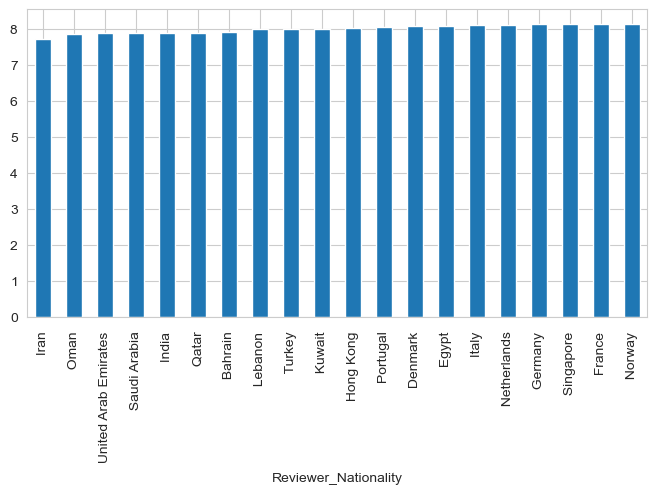

In [122]:
nationals_stat = nationals_stat.sort_values(by='average_score', ascending=True)
nationals_stat.iloc[:20, 4].plot.bar()

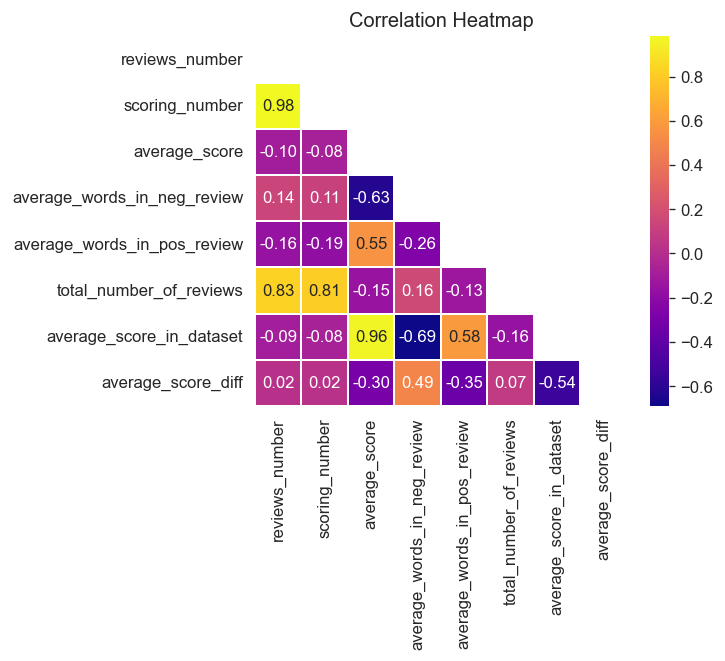

In [126]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(hotel_stat.corr(),dtype = bool))
sns.heatmap(hotel_stat.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

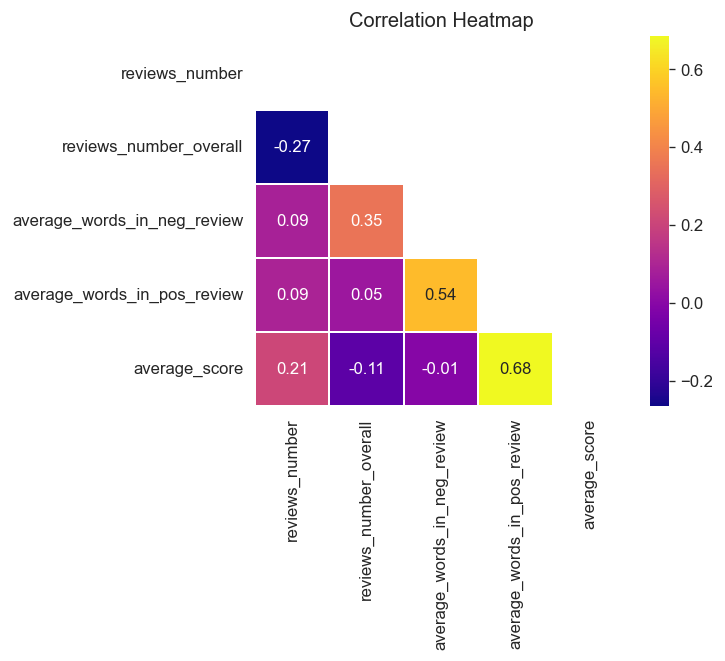

In [127]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(nationals_stat.corr(),dtype = bool))
sns.heatmap(nationals_stat.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [128]:
import nltk
from nltk import FreqDist

import re
import spacy

In [139]:
# function to plot most frequent terms
def freq_words(x, terms = 10):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [132]:
df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

C:\Users\ranas\AppData\Local\Temp\ipykernel_15156\4172906454.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
C:\Users\ranas\AppData\Local\Temp\ipykernel_15156\4172906454.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")


In [136]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(rev):
    rev_new = " ".join([i.lower() for i in rev if i.lower() not in stop_words])
    return rev_new

df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

reviews_1 = [remove_stopwords(r.split()) for r in df['Positive_Review']]
reviews_2 = [remove_stopwords(r.split()) for r in df['Negative_Review']]

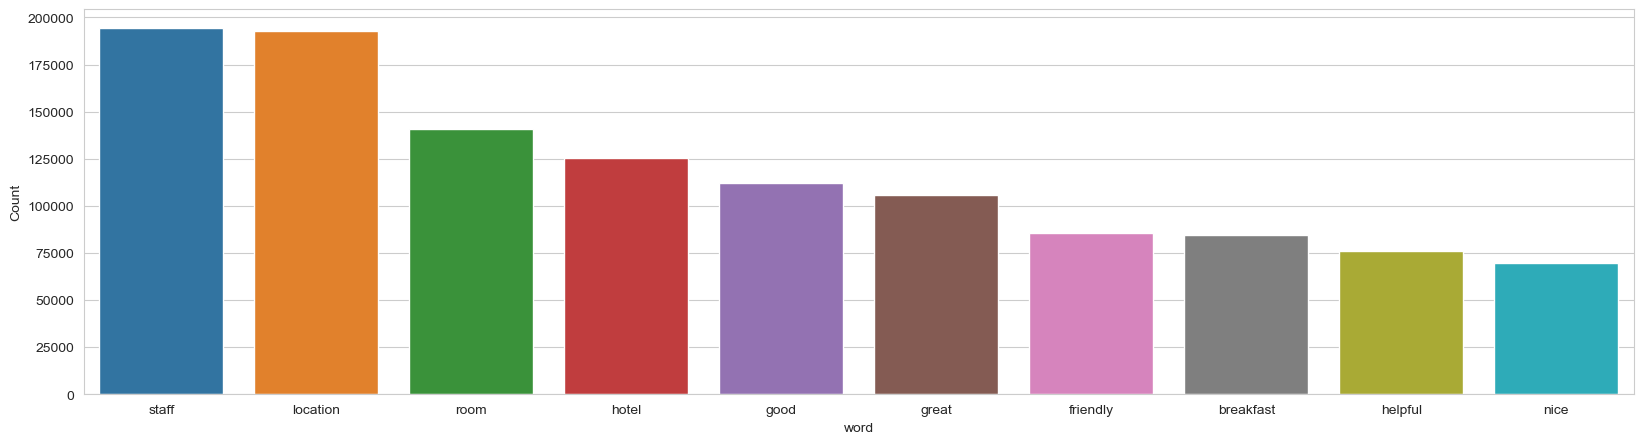

In [140]:
freq_words(reviews_1)

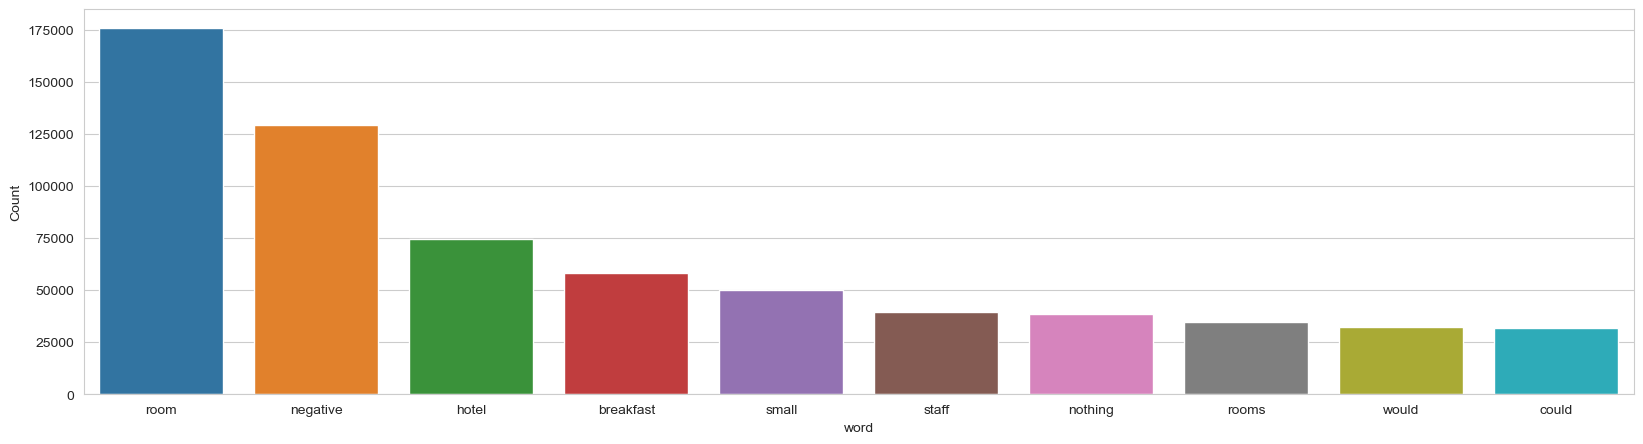

In [141]:
freq_words(reviews_2)

### Облако слов
как тут: https://www.kaggle.com/code/chinmaypisu/byop-eda

### Дальнейшее
* Что делать с lat и lag?
* Tags
* Additional_Number_of_Scoring -  There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
* days since review - Duration between the review date and scrape date
* Total_Number_of_Reviews_Reviewer_Has_Given: посмотреть, какие национальности больше всего ревьюят